In [141]:
%matplotlib inline
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# import dataset
kaggle.api.authenticate()
kaggle.api.dataset_download_files('shivachandel/kc-house-data', path='../datasets/kc_house_data', unzip=True)

In [299]:
# load data
housing_data=pd.read_csv("../datasets/kc_house_data/kc_house_data.csv")
housing_data=housing_data.dropna()
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,4.580327e+09,5.400850e+05,3.370830,2.114791,2079.853454,1.510771e+04,1.494332,0.007542,0.234325,3.409421,7.656888,1788.396095,291.457360,1971.007959,84.410069,98077.941928,47.560046,-122.213894,1986.559576,12769.025357
std,2.876592e+09,3.671430e+05,0.930092,0.770157,918.422406,4.142235e+04,0.540003,0.086521,0.766350,0.650755,1.175502,828.128162,442.487355,29.372358,401.697007,53.505054,0.138568,0.140831,685.416548,27305.369808
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [300]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [458]:
# load data
labels=housing_data["price"]
features=housing_data[[
    "bedrooms", "bathrooms", "sqft_living",
    "sqft_lot", "floors", "waterfront","view", "grade", "sqft_above", "sqft_basement", "yr_renovated"
]]

normalized_features = normalize(features)

X=normalized_features.to_numpy()
Y=labels.to_numpy()

print("data shape: ", X.shape, Y.shape)

data shape:  (21611, 11) (21611,)


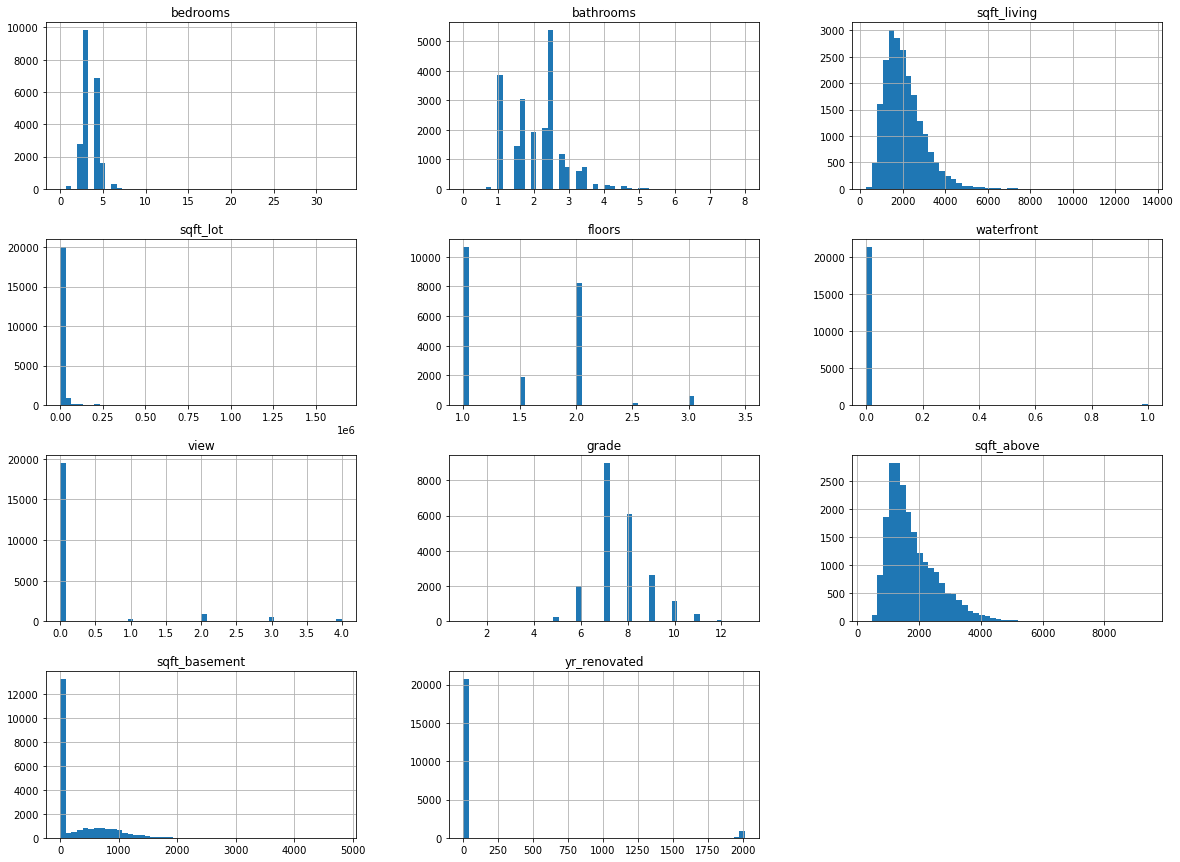

In [462]:
features.hist(bins=50, figsize=(20,15))
plt.show()

In [460]:
def init_weights(n):
    W=np.random.randn(1,n)
    b=np.random.randn()

    return (W, b)

W, b = init_weights(X.shape[1])
W, b

(array([[ 0.75078436,  1.20092947,  0.24333182,  0.50153748, -0.92226268,
          0.23060736, -0.17328906,  0.28573445, -2.15784191,  0.50851971,
         -0.12486253]]),
 0.6800097691937821)

In [311]:
def predict(x, W, b):
    Yhat = W.dot(x.T) + b
    return Yhat

ytest=predict(np.random.rand(W.shape[0], W.shape[1]), W, b)
ytest.item()

0.5654039310650407

In [461]:
def train_step(X, Y, W, b, alpha=0.01):
    m=X.shape[0]
    n=X.shape[1]

    Yhat=W.dot(X.T)+b
    error=Y-Yhat
    W=W+alpha*(2/m)*error.dot(X)
    b=b+alpha*(2/m)*np.sum(error)
    L=(1/m)*np.sum(np.power(error, 2))

    return W, b, L

iterations = 1
while True:
    W, b, L = train_step(X, Y, W, b)

    if iterations > 10000:
        print("Converged.")
        break

    if iterations % 500 == 0:
        print("Iteration: %d - Error: %.4f" %(iterations, L))

    iterations += 1

Iteration: 500 - Error: 89580221163.5165
Iteration: 1000 - Error: 77693355317.2691
Iteration: 1500 - Error: 71197161991.5329
Iteration: 2000 - Error: 67255783910.1376
Iteration: 2500 - Error: 64634746934.3945
Iteration: 3000 - Error: 62765904048.2629
Iteration: 3500 - Error: 61367475067.3802
Iteration: 4000 - Error: 60286614390.1257
Iteration: 4500 - Error: 59432368894.0464
Iteration: 5000 - Error: 58745991252.5753
Iteration: 5500 - Error: 58187059052.9370
Iteration: 6000 - Error: 57726505829.8852
Iteration: 6500 - Error: 57342817019.2949
Iteration: 7000 - Error: 57019767236.9678
Iteration: 7500 - Error: 56744967499.3722
Iteration: 8000 - Error: 56508875093.1643
Iteration: 8500 - Error: 56304089683.1683
Iteration: 9000 - Error: 56124838749.5160
Iteration: 9500 - Error: 55966594661.4910
Iteration: 10000 - Error: 55825786469.4509
Converged.
